<a href="https://colab.research.google.com/github/rupakgoyal/deep-learning/blob/master/Reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import reuters
(train_data ,train_labels),(test_data,test_labels)= \
reuters.load_data(num_words =10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step


In [3]:
train_data

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [8]:
len(train_data),len(test_data)

(8982, 2246)

In [4]:
word_index = reuters.get_word_index()
reverse_word_idex = dict([(value,key) for (key,value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_idex.get(i-3,'?') for i in train_data[1]])

557056/550378 [==============================] - 0s 0us/step


In [23]:
decoded_newswire

'? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct stakes in ? company sa ? factors generale de banque said in a statement it gave no financial details of the transaction sa ? ? turnover in 1986 was 17 5 billion belgian francs reuter 3'

In [25]:
train_labels[10]

3

In [6]:
import numpy as np
def vectorize_sequences(sequences,dimensions = 10000):
  results = np.zeros((len(sequences),dimensions))
  for i , sequence in enumerate(sequences):
    results[i,sequence] =  1.
  return results



In [7]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [8]:
def to_one_hot(labels,dimension = 46):
  results = np.zeros((len(labels),dimension))
  for i , label in enumerate(labels):
    results[i,label] = 1
  return results

In [10]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)
one_hot_train_labels.ndim

2

In [11]:

from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [13]:
from keras import models
from keras import layers

model = models.Sequential()


In [14]:
model.add(layers.Dense(64,activation = 'relu',input_shape = (10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [15]:
model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',\
              metrics = ['accuracy'])

In [18]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [19]:

# Listing 3.18 Training the model

history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 180us/step - loss: 2.6336 - accuracy: 0.5373 - val_loss: 1.7445 - val_accuracy: 0.6270
Epoch 2/20
7982/7982 [==============================] - 1s 118us/step - loss: 1.4290 - accuracy: 0.7078 - val_loss: 1.3249 - val_accuracy: 0.7340
Epoch 3/20
7982/7982 [==============================] - 1s 113us/step - loss: 1.0625 - accuracy: 0.7838 - val_loss: 1.1460 - val_accuracy: 0.7660
Epoch 4/20
7982/7982 [==============================] - 1s 113us/step - loss: 0.8334 - accuracy: 0.8257 - val_loss: 1.0518 - val_accuracy: 0.7760
Epoch 5/20
7982/7982 [==============================] - 1s 114us/step - loss: 0.6640 - accuracy: 0.8627 - val_loss: 0.9994 - val_accuracy: 0.7970
Epoch 6/20
7982/7982 [==============================] - 1s 116us/step - loss: 0.5363 - accuracy: 0.8920 - val_loss: 0.9378 - val_accuracy: 0.8080
Epoch 7/20
7982/7982 [==============================] - 1s 113us/step - loss

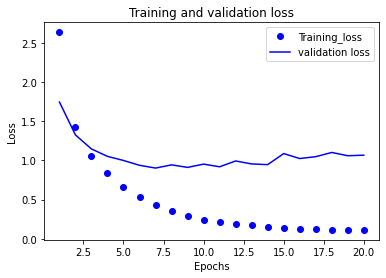

In [29]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)

plt.plot(epochs,loss,'bo',label = 'Training_loss')
plt.plot(epochs,val_loss,'b',label = 'validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

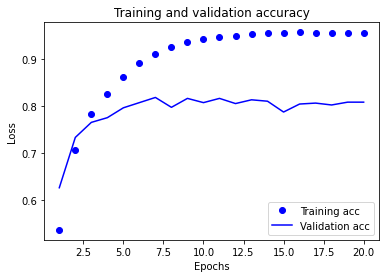

In [36]:
plt.clf()
# Clears the figure
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()
# Figure 3.9 Training and validation loss
 

In [ ]:
# Listing 3.21 Retraining a model from scratch

In [38]:
model = models.Sequential()

In [40]:
model.add(layers.Dense(64,activation='relu',input_shape = (10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))


In [44]:
model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',\
              metrics = ['accuracy'])

In [46]:
model.fit(partial_x_train,partial_y_train,epochs = 9,batch_size=512,validation_data=(x_val,y_val))
results = model.evaluate(x_test,one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 250us/step - loss: 2.6969 - accuracy: 0.4876 - val_loss: 1.7491 - val_accuracy: 0.6080
Epoch 2/9
7982/7982 [==============================] - 1s 118us/step - loss: 1.4629 - accuracy: 0.6790 - val_loss: 1.3937 - val_accuracy: 0.6630
Epoch 3/9
7982/7982 [==============================] - 1s 117us/step - loss: 1.1198 - accuracy: 0.7494 - val_loss: 1.2272 - val_accuracy: 0.7180
Epoch 4/9
7982/7982 [==============================] - 1s 118us/step - loss: 0.8994 - accuracy: 0.7923 - val_loss: 1.1084 - val_accuracy: 0.7570
Epoch 5/9
7982/7982 [==============================] - 1s 117us/step - loss: 0.7126 - accuracy: 0.8354 - val_loss: 1.0930 - val_accuracy: 0.7560
Epoch 6/9
7982/7982 [==============================] - 1s 117us/step - loss: 0.5854 - accuracy: 0.8631 - val_loss: 1.2064 - val_accuracy: 0.7170
Epoch 7/9
7982/7982 [==============================] - 1s 116us/step - loss: 0.474

In [47]:
results

[1.1783921370417119, 0.7702582478523254]

In [48]:
import copy
test_labels_copy = copy.copy(test_labels)


In [50]:
np.random.shuffle(test_labels_copy)

In [51]:
its_array =h np.array(test_labels) == np.array(test_labels_copy)

array([False, False,  True, ..., False,  True, False])

In [53]:
float(np.sum(hits_array)) / len(test_labels)

0.19367764915405164

In [ ]:
# This approach reaches an accuracy of ~80%. With a balanced binary classification problem, the accuracy reached by a purely random classifier would be 50%. But in this case it’s closer to 19%, so the results seem pretty good, at least when compared to a random baseline:


In [55]:
predictions = model.predict(x_test)

In [62]:
predictions[2].shape

(46,)

In [64]:
np.sum(predictions[2])

1.0

In [65]:
np.argmax(predictions[0])

3

In [68]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [71]:
# A different way to handle the labels and the loss
y_train = np.array(train_labels)
y_test = np.array(test_labels)


In [72]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',
metrics=['acc'])

In [ ]:
"""
 The only thing this approach 
 would change is the choice of the loss function. 
 The loss function used in listing 3.21, categorical_crossentropy, expects the labels to follow 
 a categorical encoding. With 
 integer labels, you should use sparse_categorical_ crossentropy:

 """


In [78]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',\
metrics=['accuracy']) 
model.fit(partial_x_train,\
          partial_y_train,\
          epochs=10,\
          batch_size=128,\
          validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 1s 159us/step - loss: 1.8896 - accuracy: 0.6463 - val_loss: 1.2326 - val_accuracy: 0.7420
Epoch 2/10
7982/7982 [==============================] - 1s 153us/step - loss: 0.9357 - accuracy: 0.8031 - val_loss: 0.9903 - val_accuracy: 0.7870
Epoch 3/10
7982/7982 [==============================] - 1s 148us/step - loss: 0.6328 - accuracy: 0.8708 - val_loss: 0.8775 - val_accuracy: 0.8260
Epoch 4/10
7982/7982 [==============================] - 1s 153us/step - loss: 0.4500 - accuracy: 0.9074 - val_loss: 0.8167 - val_accuracy: 0.8300
Epoch 5/10
7982/7982 [==============================] - 1s 152us/step - loss: 0.3366 - accuracy: 0.9273 - val_loss: 0.8172 - val_accuracy: 0.8250
Epoch 6/10
7982/7982 [==============================] - 1s 153us/step - loss: 0.2651 - accuracy: 0.9406 - val_loss: 0.8233 - val_accuracy: 0.8330
Epoch 7/10
7982/7982 [==============================] - 1s 150us/step - loss

In [ ]:
"""
Here’s what you should take away from this example:
 If you’re trying to classify data points among N classes, your network should end with a Dense layer of size N.
 In a single-label, multiclass classification problem, your network should end with a softmax activation so that it will output a probability distribution over the N output classes.
 Categorical crossentropy is almost always the loss function you should use for such problems. It minimizes the distance between the probability distributions output by the network and the true distribution of the targets.
 There are two ways to handle labels in multiclass classification:
– Encoding the labels via categorical encoding (also known as one-hot encod-
ing) and using categorical_crossentropy as a loss function
– Encoding the labels as integers and using the sparse_categorical_crossentropy
loss function
 If you need to classify data into a large number of categories, you should avoid
creating information bottlenecks in your network due to intermediate layers that are too small.

""